# 🤖 Intro to Machine Learning Week 2
## Neural Networks and Gradient Descent
By Ellie Zhou, August 2025

### What you'll learn in this notebook:
  1. **Neural Network Basics**
    - What neurons, weights, biases, and activation functions are
    - How data flows through network layers
  2. **Gradient Descent Algorithm**
    - How neural networks learn by minimizing loss
    - Visualizing optimization as "rolling down a hill"
  3. **PyTorch Fundamentals**
    - Creating tensors and models with nn.Module
    - Training loops: forward pass, loss calculation, backpropagation

### Instructions:
- Read each section carefully
- Run each code cell by clicking the ▶️ button or pressing Shift+Enter
- Don't worry if you don't understand all the Python code - focus on the concepts!
- Ask questions in Discord if you get stuck

---

In [1]:
# Import essential libraries for our neural network tutorial
import torch
import torch.nn as nn  # Neural network modules
import torch.optim as optim  # Optimization algorithms
import torch.nn.functional as F  # Activation functions and more

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configure matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")

Libraries imported successfully!
PyTorch version: 2.6.0+cu124


## 1. What are Neural Networks?

Neural networks are computational models inspired by biological neural networks. They consist of:

- **Neurons (nodes)**: Basic processing units that receive inputs and produce outputs
- **Weights**: Parameters that determine the strength of connections between neurons
- **Biases**: Additional parameters that shift the activation function
- **Activation functions**: Non-linear functions that introduce complexity

### Simple Mathematical Representation

For a single neuron:
```
output = activation_function(weights • inputs + bias)
```

Let's visualize this concept:

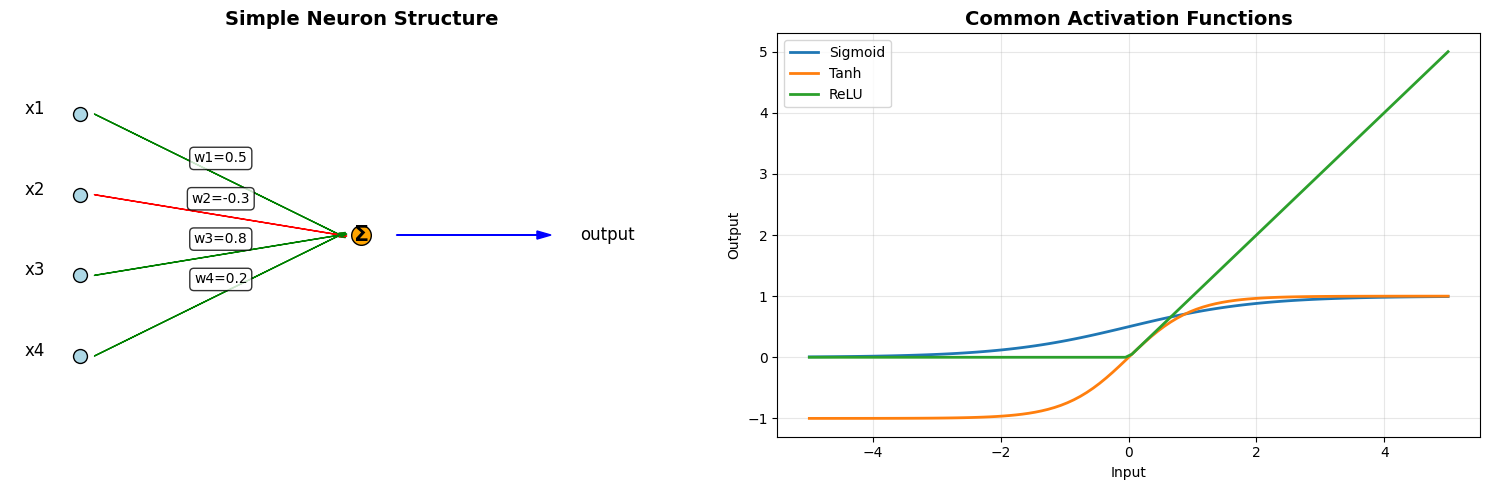

In [2]:
# Let's create a simple visualization of a neural network
def visualize_simple_neuron():
    """
    Visualize how a simple neuron processes inputs
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Left plot: Neuron structure
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)

    # Draw inputs
    inputs = [(1, 8), (1, 6), (1, 4), (1, 2)]
    for i, (x, y) in enumerate(inputs):
        ax1.scatter(x, y, s=100, c='lightblue', edgecolor='black')
        ax1.text(x-0.5, y, f'x{i+1}', fontsize=12, ha='right')

    # Draw neuron
    ax1.scatter(5, 5, s=200, c='orange', edgecolor='black')
    ax1.text(5, 5, 'Σ', fontsize=16, ha='center', va='center', fontweight='bold')

    # Draw connections with weights
    weights = [0.5, -0.3, 0.8, 0.2]
    for i, ((x1, y1), w) in enumerate(zip(inputs, weights)):
        ax1.arrow(x1+0.2, y1, 3.5, 5-y1, head_width=0.1, head_length=0.1,
                 fc='red' if w < 0 else 'green', ec='red' if w < 0 else 'green')
        ax1.text((x1+5)/2, (y1+5)/2 + 0.3, f'w{i+1}={w}', fontsize=10,
                ha='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Draw output
    ax1.arrow(5.5, 5, 2, 0, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
    ax1.text(8.5, 5, 'output', fontsize=12, ha='center', va='center')

    ax1.set_title('Simple Neuron Structure', fontsize=14, fontweight='bold')
    ax1.axis('off')

    # Right plot: Activation functions
    x = np.linspace(-5, 5, 100)

    # Common activation functions
    sigmoid = 1 / (1 + np.exp(-x))
    tanh = np.tanh(x)
    relu = np.maximum(0, x)

    ax2.plot(x, sigmoid, label='Sigmoid', linewidth=2)
    ax2.plot(x, tanh, label='Tanh', linewidth=2)
    ax2.plot(x, relu, label='ReLU', linewidth=2)

    ax2.set_xlabel('Input')
    ax2.set_ylabel('Output')
    ax2.set_title('Common Activation Functions', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

visualize_simple_neuron()

## 2. Understanding Gradient Descent

**Gradient Descent** is the optimization algorithm that allows neural networks to learn. Think of it as finding the lowest point in a valley while blindfolded:

1. **Start somewhere** (random initialization)
2. **Feel the slope** (compute gradients)
3. **Take a step downhill** (update parameters)
4. **Repeat until you reach the bottom** (convergence)

### Mathematical Foundation

- **Loss Function**: Measures how wrong our predictions are
- **Gradient**: Direction of steepest increase (we go opposite direction)
- **Learning Rate**: How big steps we take

```
new_weight = old_weight - learning_rate × gradient
```

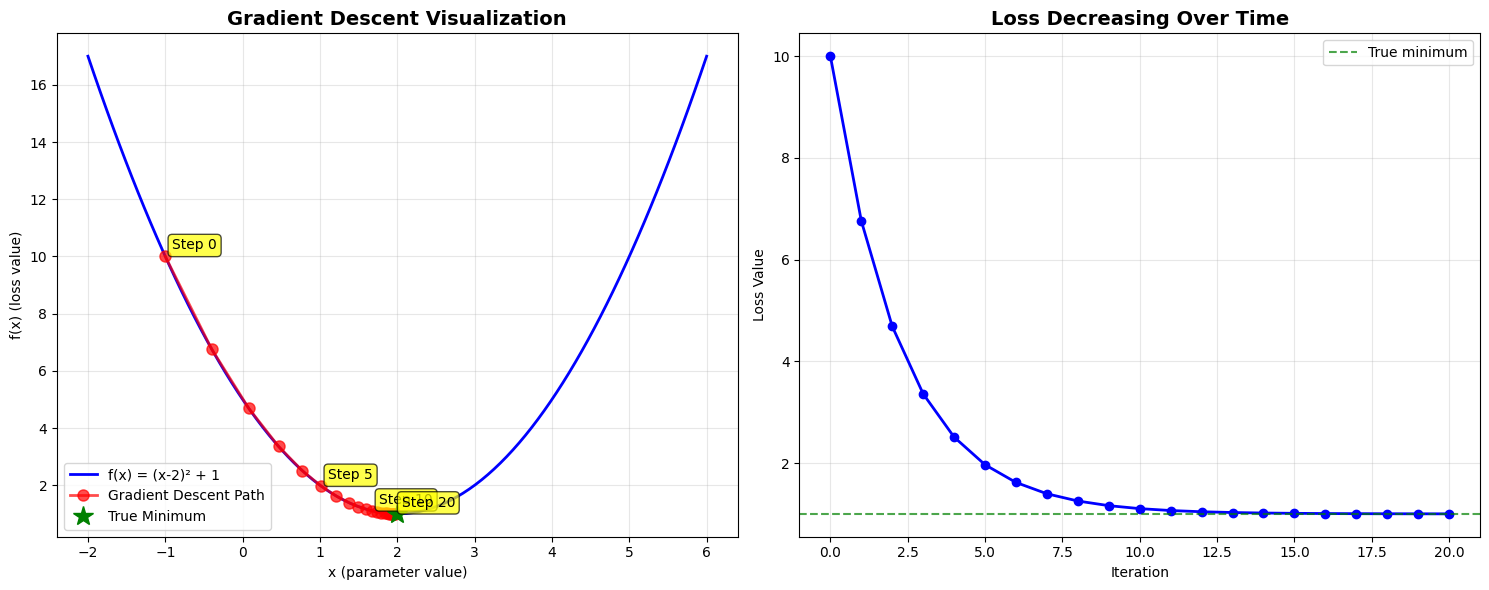

Starting position: x = -1.000, Loss = 10.000
Final position: x = 1.965, Loss = 1.001
True minimum: x = 2.000, Loss = 1.000


In [3]:
# Let's visualize gradient descent in action!
def visualize_gradient_descent():
    """
    Visualize how gradient descent finds the minimum of a function
    """
    # Define a simple quadratic function: f(x) = (x-2)^2 + 1
    def f(x):
        return (x - 2)**2 + 1

    def df_dx(x):
        return 2 * (x - 2)  # Derivative

    # Gradient descent parameters
    learning_rate = 0.1
    num_iterations = 20

    # Starting point
    x_current = -1.0

    # Store the path for visualization
    x_path = [x_current]
    y_path = [f(x_current)]

    # Perform gradient descent
    for i in range(num_iterations):
        gradient = df_dx(x_current)
        x_current = x_current - learning_rate * gradient

        x_path.append(x_current)
        y_path.append(f(x_current))

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Left plot: Function and gradient descent path
    x = np.linspace(-2, 6, 100)
    y = f(x)

    ax1.plot(x, y, 'b-', linewidth=2, label='f(x) = (x-2)² + 1')
    ax1.plot(x_path, y_path, 'ro-', markersize=8, linewidth=2,
             label='Gradient Descent Path', alpha=0.7)
    ax1.plot(2, 1, 'g*', markersize=15, label='True Minimum')

    # Annotate some steps
    for i in [0, 5, 10, len(x_path)-1]:
        ax1.annotate(f'Step {i}', (x_path[i], y_path[i]),
                    xytext=(5, 5), textcoords='offset points',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

    ax1.set_xlabel('x (parameter value)')
    ax1.set_ylabel('f(x) (loss value)')
    ax1.set_title('Gradient Descent Visualization', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Right plot: Loss over iterations
    ax2.plot(range(len(y_path)), y_path, 'bo-', linewidth=2, markersize=6)
    ax2.axhline(y=1, color='g', linestyle='--', alpha=0.7, label='True minimum')

    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Loss Value')
    ax2.set_title('Loss Decreasing Over Time', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Starting position: x = {x_path[0]:.3f}, Loss = {y_path[0]:.3f}")
    print(f"Final position: x = {x_path[-1]:.3f}, Loss = {y_path[-1]:.3f}")
    print(f"True minimum: x = 2.000, Loss = 1.000")

visualize_gradient_descent()

## 3. Linear Regression with PyTorch

Let's start with the simplest neural network: **Linear Regression**. This is essentially a single neuron without activation function!

**Goal**: Given input features, predict a continuous target value.

**Model**: `y = w₁x₁ + w₂x₂ + ... + wₙxₙ + b`

We'll implement this step-by-step to understand how PyTorch works.

Dataset shape: (100, 1)
Target shape: (100,)
X tensor shape: torch.Size([100, 1])
y tensor shape: torch.Size([100, 1])


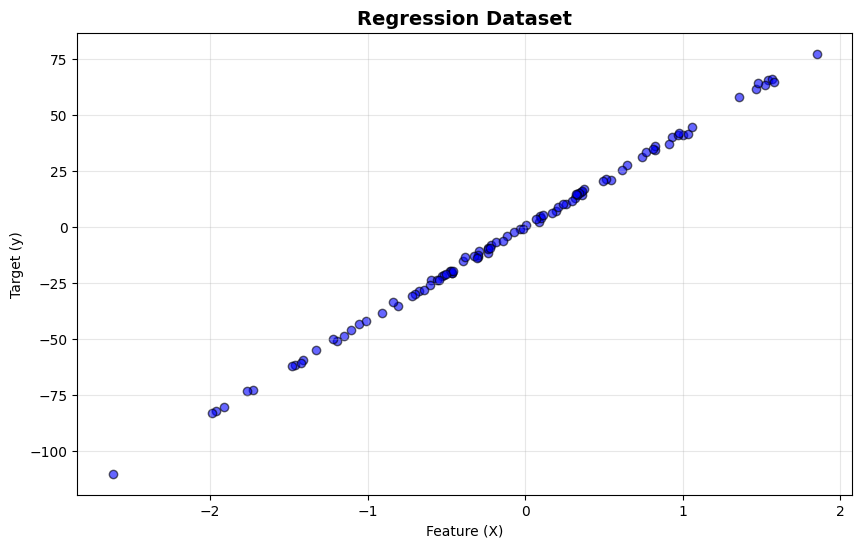

In [4]:
# Step 1: Create synthetic data for regression
def create_regression_data(n_samples=100, n_features=1, noise=0.1):
    """
    Create synthetic regression data for our tutorial
    """
    # Generate features and target with some noise
    X, y = make_regression(n_samples=n_samples, n_features=n_features,
                          noise=noise*10, random_state=42)

    return X, y

# Create our dataset
X, y = create_regression_data(n_samples=100, n_features=1, noise=0.1)

# Convert to PyTorch tensors
# Tensors are PyTorch's version of numpy arrays, but with GPU support and automatic differentiation
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).reshape(-1, 1)  # Reshape to column vector

print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"X tensor shape: {X_tensor.shape}")
print(f"y tensor shape: {y_tensor.shape}")

# Visualize our data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue', edgecolor='black')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Regression Dataset', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
# Step 2: Define our Linear Regression model
class LinearRegression(nn.Module):
    """
    Simple Linear Regression model using PyTorch

    This inherits from nn.Module, which provides:
    - Automatic gradient computation
    - Parameter management
    - GPU support
    """
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()  # Initialize parent class

        # Define our linear layer (fully connected layer)
        # This creates: output = input * weight + bias
        self.linear = nn.Linear(input_size, 1)

        # nn.Linear automatically initializes weights and bias
        # Weight: random values from uniform distribution
        # Bias: initialized to zero

    def forward(self, x):
        """
        Forward pass: compute predictions

        Args:
            x: Input tensor of shape (batch_size, input_size)

        Returns:
            predictions: Output tensor of shape (batch_size, 1)
        """
        return self.linear(x)

# Create our model
model = LinearRegression(input_size=1)

# Print model architecture
print("Model Architecture:")
print(model)

# Print initial parameters
print("\nInitial Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# Count total parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params}")

Model Architecture:
LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

Initial Parameters:
linear.weight: tensor([[-0.2343]])
linear.bias: tensor([0.9186])

Total parameters: 2


Loss function: MSELoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Learning rate: 0.01

Initial loss: 1484.9041


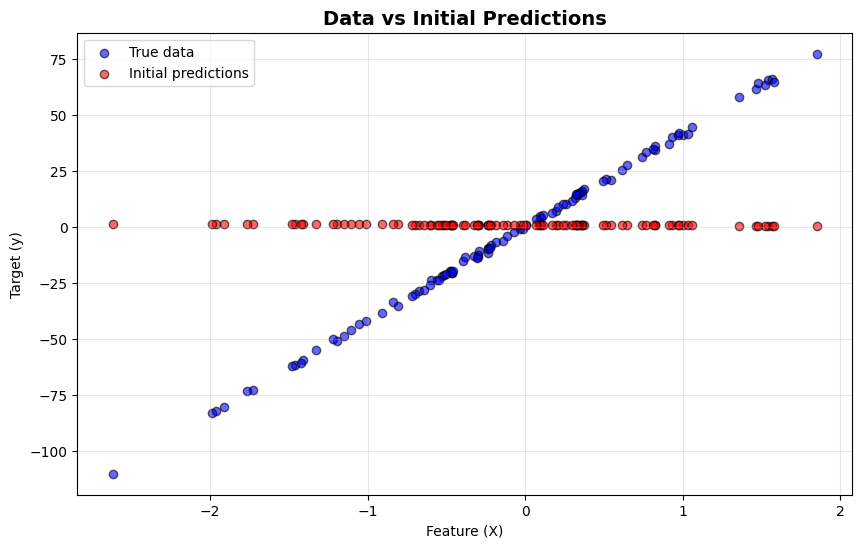

In [12]:
# Step 3: Set up training components

# Define loss function (criterion)
# Mean Squared Error: measures average squared difference between predictions and targets
criterion = nn.MSELoss()

# Define optimizer
# SGD (Stochastic Gradient Descent) will update our model's parameters
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Learning rate: {learning_rate}")

# Let's see what our model predicts before training
with torch.no_grad():  # Disable gradient computation for efficiency
    initial_predictions = model(X_tensor)
    initial_loss = criterion(initial_predictions, y_tensor)

print(f"\nInitial loss: {initial_loss.item():.4f}")

# Visualize initial predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue', label='True data', edgecolor='black')
plt.scatter(X, initial_predictions.detach().cpu().numpy(), alpha=0.6, color='red',
           label='Initial predictions', edgecolor='black')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Data vs Initial Predictions', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
# Step 4: Training loop - This is where the magic happens!

def train_linear_regression(model, X_tensor, y_tensor, criterion, optimizer, num_epochs=1000):
    """
    Train our linear regression model

    Args:
        model: Our PyTorch model
        X_tensor: Input features
        y_tensor: Target values
        criterion: Loss function
        optimizer: Optimization algorithm
        num_epochs: Number of training iterations

    Returns:
        loss_history: List of loss values during training
    """

    loss_history = []

    for epoch in range(num_epochs):
        # 1. Forward pass: compute predictions
        predictions = model(X_tensor)

        # 2. Compute loss
        loss = criterion(predictions, y_tensor)

        # 3. Backward pass: compute gradients
        optimizer.zero_grad()  # Clear previous gradients (important!)
        loss.backward()        # Compute gradients using backpropagation

        # 4. Update parameters
        optimizer.step()       # Apply gradient descent step

        # Store loss for plotting
        loss_history.append(loss.item())

        # Print progress every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    return loss_history

# Train the model
print("Starting training...")
loss_history = train_linear_regression(model, X_tensor, y_tensor, criterion, optimizer, num_epochs=1000)
print("Training completed!")

# Print final parameters
print("\nFinal Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

Starting training...
Epoch [100/1000], Loss: 56.2976
Epoch [200/1000], Loss: 3.0273
Epoch [300/1000], Loss: 0.8756
Epoch [400/1000], Loss: 0.7846
Epoch [500/1000], Loss: 0.7807
Epoch [600/1000], Loss: 0.7806
Epoch [700/1000], Loss: 0.7805
Epoch [800/1000], Loss: 0.7805
Epoch [900/1000], Loss: 0.7805
Epoch [1000/1000], Loss: 0.7805
Training completed!

Final Parameters:
linear.weight: tensor([[42.0106]])
linear.bias: tensor([0.1165])


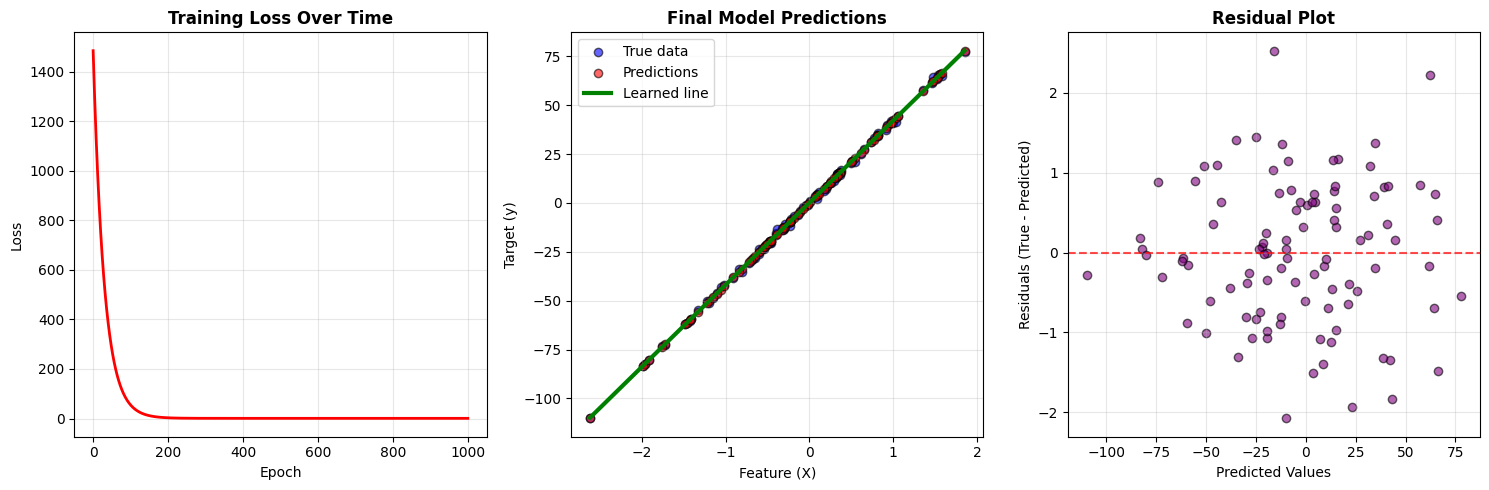


Model Performance:
Final loss: 0.7805
R-squared score: 0.9995
Mean absolute error: 0.7105


In [14]:
# Step 5: Visualize training results

# Plot training loss
plt.figure(figsize=(15, 5))

# Left plot: Training loss over time
plt.subplot(1, 3, 1)
plt.plot(loss_history, linewidth=2, color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time', fontweight='bold')
plt.grid(True, alpha=0.3)

# Middle plot: Final predictions vs true values
with torch.no_grad():
    final_predictions = model(X_tensor)

plt.subplot(1, 3, 2)
plt.scatter(X, y, alpha=0.6, color='blue', label='True data', edgecolor='black')
plt.scatter(X, final_predictions.detach().numpy(), alpha=0.6, color='red',
           label='Predictions', edgecolor='black')

# Draw the learned line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_line_tensor = torch.FloatTensor(X_line)
with torch.no_grad():
    y_line = model(X_line_tensor).detach().numpy()

plt.plot(X_line, y_line, color='green', linewidth=3, label='Learned line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Final Model Predictions', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Right plot: Residuals (prediction errors)
plt.subplot(1, 3, 3)
residuals = y - final_predictions.detach().numpy().flatten()
plt.scatter(final_predictions.detach().numpy(), residuals, alpha=0.6, color='purple', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Plot', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate R-squared score
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print(f"\nModel Performance:")
print(f"Final loss: {loss_history[-1]:.4f}")
print(f"R-squared score: {r2_score:.4f}")
print(f"Mean absolute error: {np.mean(np.abs(residuals)):.4f}")

## 4. Building a Multi-Layer Neural Network

Now let's build a **real neural network** with multiple layers! This will allow us to learn more complex patterns.

### Key Concepts:
- **Hidden Layers**: Layers between input and output that learn feature representations
- **Activation Functions**: Non-linear functions that allow networks to learn complex patterns
- **Forward Propagation**: Data flows from input to output
- **Backpropagation**: Gradients flow backwards to update weights

We'll create a classification problem to showcase the power of neural networks.

Training set shape: (800, 2)
Test set shape: (200, 2)
Number of classes: 3


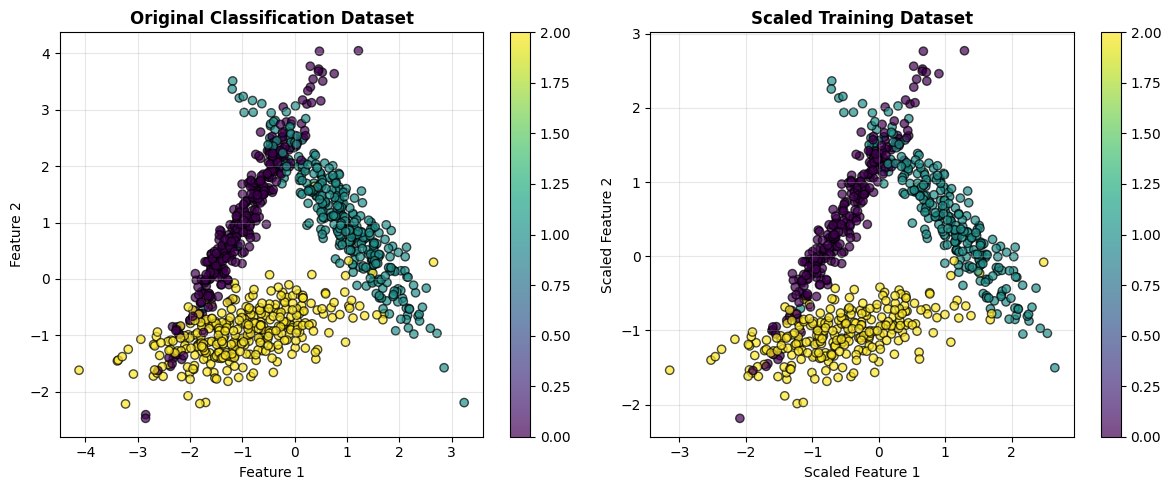

In [17]:
# Create a more complex dataset for classification
def create_classification_data(n_samples=1000, n_features=2, n_classes=3):
    """
    Create a multi-class classification dataset
    """
    X, y = make_classification(n_samples=n_samples, n_features=n_features,
                              n_redundant=0, n_informative=2, n_clusters_per_class=1,
                              n_classes=n_classes, random_state=42)

    return X, y

# Create our classification dataset
X_class, y_class = create_classification_data(n_samples=1000, n_features=2, n_classes=3)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2,
                                                    random_state=42, stratify=y_class)

# Standardize the features, so that each feature has a mean of 0 and STD of 1 (important for neural networks!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train)  # LongTensor for classification
y_test_tensor = torch.LongTensor(y_test)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_class))}")

# Visualize the classification dataset
plt.figure(figsize=(12, 5))

# Original data
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='viridis',
                     alpha=0.7, edgecolor='black')
plt.colorbar(scatter)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Classification Dataset', fontweight='bold')
plt.grid(True, alpha=0.3)

# Scaled training data
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis',
                     alpha=0.7, edgecolor='black')
plt.colorbar(scatter)
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.title('Scaled Training Dataset', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
# Define our Multi-Layer Neural Network
class NeuralNetwork(nn.Module):
    """
    Multi-layer neural network for classification

    Architecture:
    Input Layer (2 features) -> Hidden Layer 1 (64 neurons) -> Hidden Layer 2 (32 neurons) -> Output Layer (3 classes)
    """
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNetwork, self).__init__()

        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size1)      # First hidden layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)    # Second hidden layer
        self.fc3 = nn.Linear(hidden_size2, num_classes)     # Output layer

        # We'll use ReLU activation function
        self.relu = nn.ReLU()

        # Dropout for regularization (prevents overfitting)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        """
        Forward pass through the network

        Args:
            x: Input tensor of shape (batch_size, input_size)

        Returns:
            output: Output tensor of shape (batch_size, num_classes)
        """
        # First hidden layer with ReLU activation
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Second hidden layer with ReLU activation
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Output layer (no activation here - we'll use CrossEntropyLoss)
        x = self.fc3(x)

        return x

# Create our neural network
input_size = 2      # 2 features
hidden_size1 = 64   # First hidden layer size
hidden_size2 = 32   # Second hidden layer size
num_classes = 3     # 3 output classes

neural_net = NeuralNetwork(input_size, hidden_size1, hidden_size2, num_classes)

print("Neural Network Architecture:")
print(neural_net)

# Count parameters
total_params = sum(p.numel() for p in neural_net.parameters())
trainable_params = sum(p.numel() for p in neural_net.parameters() if p.requires_grad)

print(f"\nTotal parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

# Breakdown by layer
print("\nParameters by layer:")
for name, param in neural_net.named_parameters():
    print(f"{name}: {param.shape} -> {param.numel()} parameters")

Neural Network Architecture:
NeuralNetwork(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

Total parameters: 2371
Trainable parameters: 2371

Parameters by layer:
fc1.weight: torch.Size([64, 2]) -> 128 parameters
fc1.bias: torch.Size([64]) -> 64 parameters
fc2.weight: torch.Size([32, 64]) -> 2048 parameters
fc2.bias: torch.Size([32]) -> 32 parameters
fc3.weight: torch.Size([3, 32]) -> 96 parameters
fc3.bias: torch.Size([3]) -> 3 parameters


In [20]:
# Set up training for our neural network

# Use CrossEntropyLoss for multi-class classification
criterion_nn = nn.CrossEntropyLoss()

# Use Adam optimizer (more advanced than SGD)
# Adam adapts learning rate for each parameter and uses momentum
optimizer_nn = optim.Adam(neural_net.parameters(), lr=0.001, weight_decay=1e-5)

print(f"Loss function: {criterion_nn}")
print(f"Optimizer: {optimizer_nn}")

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    """
    Calculate accuracy for classification
    """
    _, predicted = torch.max(outputs.data, 1)  # Get predicted class
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    return correct / total

# Test initial performance
with torch.no_grad():
    neural_net.eval()  # Set to evaluation mode
    initial_outputs = neural_net(X_train_tensor)
    initial_loss = criterion_nn(initial_outputs, y_train_tensor)
    initial_accuracy = calculate_accuracy(initial_outputs, y_train_tensor)

print(f"\nInitial Performance:")
print(f"Loss: {initial_loss.item():.4f}")
print(f"Accuracy: {initial_accuracy:.4f} ({initial_accuracy*100:.1f}%)")
print(f"Random guess accuracy: {1/num_classes:.4f} ({100/num_classes:.1f}%)")

Loss function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 1e-05
)

Initial Performance:
Loss: 1.1652
Accuracy: 0.3350 (33.5%)
Random guess accuracy: 0.3333 (33.3%)


In [21]:
# Training function for neural network
def train_neural_network(model, X_train, y_train, X_test, y_test, criterion, optimizer, num_epochs=200):
    """
    Train neural network with validation monitoring
    """
    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()  # Set to training mode (enables dropout)

        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        train_accuracy = calculate_accuracy(outputs, y_train)

        # Evaluation phase
        model.eval()  # Set to evaluation mode (disables dropout)
        with torch.no_grad():
            test_outputs = model(X_test)
            test_accuracy = calculate_accuracy(test_outputs, y_test)

        # Store metrics
        train_losses.append(loss.item())
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Print progress
        if (epoch + 1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] - '
                  f'Loss: {loss.item():.4f}, '
                  f'Train Acc: {train_accuracy:.3f}, '
                  f'Test Acc: {test_accuracy:.3f}')

    return train_losses, train_accuracies, test_accuracies

# Train the neural network
print("Training Neural Network...")
train_losses, train_accs, test_accs = train_neural_network(
    neural_net, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor,
    criterion_nn, optimizer_nn, num_epochs=200
)
print("Training completed!")

Training Neural Network...
Epoch [50/200] - Loss: 0.6389, Train Acc: 0.820, Test Acc: 0.810
Epoch [100/200] - Loss: 0.3489, Train Acc: 0.886, Test Acc: 0.865
Epoch [150/200] - Loss: 0.2948, Train Acc: 0.889, Test Acc: 0.875
Epoch [200/200] - Loss: 0.2687, Train Acc: 0.892, Test Acc: 0.875
Training completed!


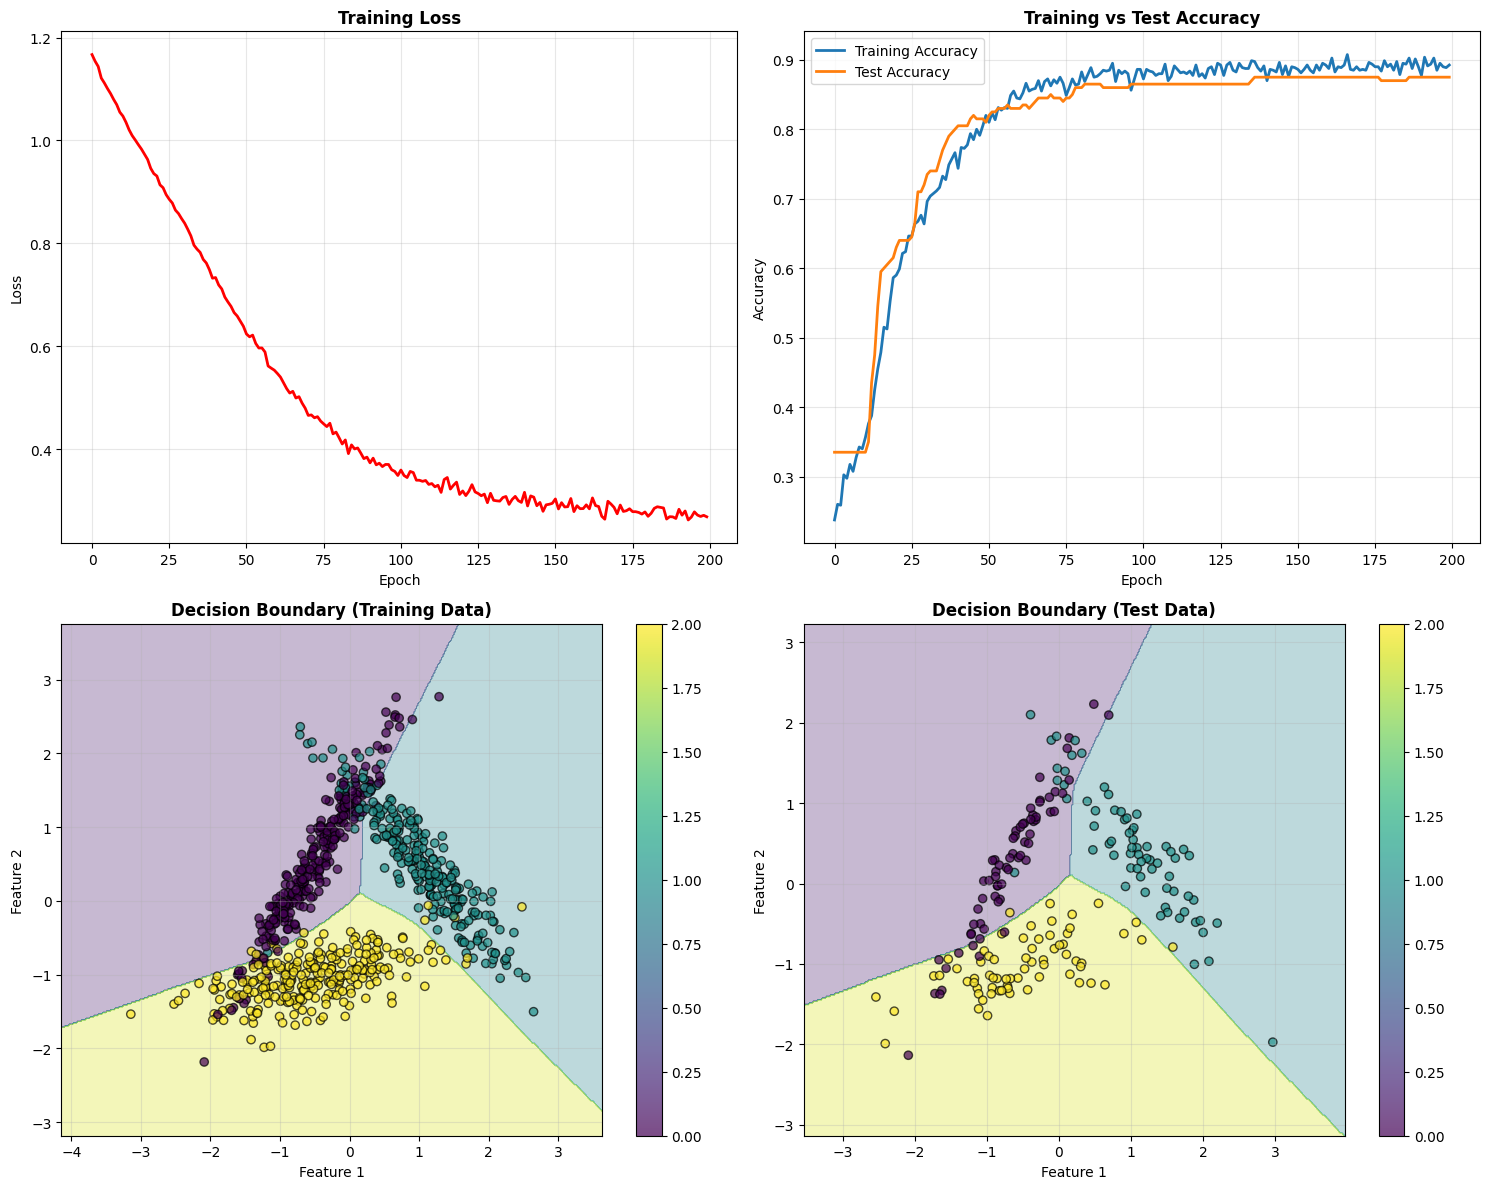


Final Performance Summary:
Training Accuracy: 0.8925 (89.2%)
Test Accuracy: 0.8750 (87.5%)
Final Training Loss: 0.2687
✅ Good generalization (gap: 0.017)


In [24]:
# Visualize neural network training results
def plot_training_results(train_losses, train_accs, test_accs):
    """
    Plot training metrics and decision boundary
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Plot 1: Training loss
    axes[0, 0].plot(train_losses, linewidth=2, color='red')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Training Loss', fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Training vs Test Accuracy
    axes[0, 1].plot(train_accs, label='Training Accuracy', linewidth=2)
    axes[0, 1].plot(test_accs, label='Test Accuracy', linewidth=2)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_title('Training vs Test Accuracy', fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Plot 3: Decision boundary
    def plot_decision_boundary(model, X, y, ax, title):
        # Create a mesh
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

        # Make predictions on the mesh
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        mesh_tensor = torch.FloatTensor(mesh_points)

        model.eval()
        with torch.no_grad():
            mesh_outputs = model(mesh_tensor)
            _, mesh_predictions = torch.max(mesh_outputs, 1)
            mesh_predictions = mesh_predictions.numpy()

        # Plot the decision boundary
        Z = mesh_predictions.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

        # Plot the data points
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
                           edgecolor='black', alpha=0.7)
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_title(title, fontweight='bold')
        ax.grid(True, alpha=0.3)
        return scatter

    # Training data decision boundary
    scatter1 = plot_decision_boundary(neural_net, X_train_scaled, y_train,
                                     axes[1, 0], 'Decision Boundary (Training Data)')

    # Test data decision boundary
    scatter2 = plot_decision_boundary(neural_net, X_test_scaled, y_test,
                                     axes[1, 1], 'Decision Boundary (Test Data)')

    # Add colorbars
    plt.colorbar(scatter1, ax=axes[1, 0])
    plt.colorbar(scatter2, ax=axes[1, 1])

    plt.tight_layout()
    plt.show()

plot_training_results(train_losses, train_accs, test_accs)

# Final performance summary
print(f"\nFinal Performance Summary:")
print(f"Training Accuracy: {train_accs[-1]:.4f} ({train_accs[-1]*100:.1f}%)")
print(f"Test Accuracy: {test_accs[-1]:.4f} ({test_accs[-1]*100:.1f}%)")
print(f"Final Training Loss: {train_losses[-1]:.4f}")

# Check for overfitting
overfitting = train_accs[-1] - test_accs[-1]
if overfitting > 0.1:
    print(f"⚠️  Warning: Potential overfitting detected (gap: {overfitting:.3f})")
else:
    print(f"✅ Good generalization (gap: {overfitting:.3f})")